In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE


In [3]:
# Load the Housing Price Dataset (Kaggle)

data = pd.read_csv('House Price Prediction Dataset.csv')

# View the first few rows
print(data.head())


   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [5]:
# Summary statistics and missing values
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB
None
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [6]:
# One-hot encoding for categorical variables
encoded_data = pd.get_dummies(data, columns=['Location', 'Condition', 'Garage'], drop_first=True)

# Check the transformed dataset
print(encoded_data.head())


   Area  Bedrooms  Bathrooms  Floors  YearBuilt   Price  Location_Rural  \
0  1360         5          4       3       1970  149919           False   
1  4272         5          4       3       1958  424998           False   
2  3592         2          2       3       1938  266746           False   
3   966         4          2       2       1902  244020           False   
4  4926         1          4       2       1975  636056           False   

   Location_Suburban  Location_Urban  Condition_Fair  Condition_Good  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False            True   
3               True           False            True           False   
4              False           False            True           False   

   Condition_Poor  Garage_Yes  
0           False       False  
1           False       False  
2           False   

In [7]:
# Define numerical columns to scale
numerical_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']

# StandardScaler for normalization
scaler = StandardScaler()
encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])

# Check the scaled dataset
print(encoded_data.head())


       Area  Bedrooms  Bathrooms    Floors  YearBuilt   Price  Location_Rural  \
0 -1.101471  1.401791   1.305568  1.244151   0.238155  149919           False   
1  1.147485  1.401791   1.305568  1.244151  -0.095942  424998           False   
2  0.622317 -0.704581  -0.498326  1.244151  -0.652770  266746           False   
3 -1.405759  0.699667  -0.498326  0.008035  -1.655061  244020           False   
4  1.652574 -1.406705   1.305568  0.008035   0.377363  636056           False   

   Location_Suburban  Location_Urban  Condition_Fair  Condition_Good  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False            True   
3               True           False            True           False   
4              False           False            True           False   

   Condition_Poor  Garage_Yes  
0           False       False  
1           Fals

In [8]:
# Separate features and target variable
X = encoded_data.drop('Price', axis=1)  # Features
y = encoded_data['Price']  # Target

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


Training Data Shape: (1600, 12)
Test Data Shape: (400, 12)


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)


In [10]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)


In [11]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)


In [12]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-" * 30)

# Evaluate models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Linear Regression Performance:
RMSE: 279859.73
MAE: 243241.98
R2 Score: -0.01
------------------------------
Decision Tree Performance:
RMSE: 400741.05
MAE: 328257.15
R2 Score: -1.06
------------------------------
XGBoost Performance:
RMSE: 315639.47
MAE: 269664.41
R2 Score: -0.28
------------------------------


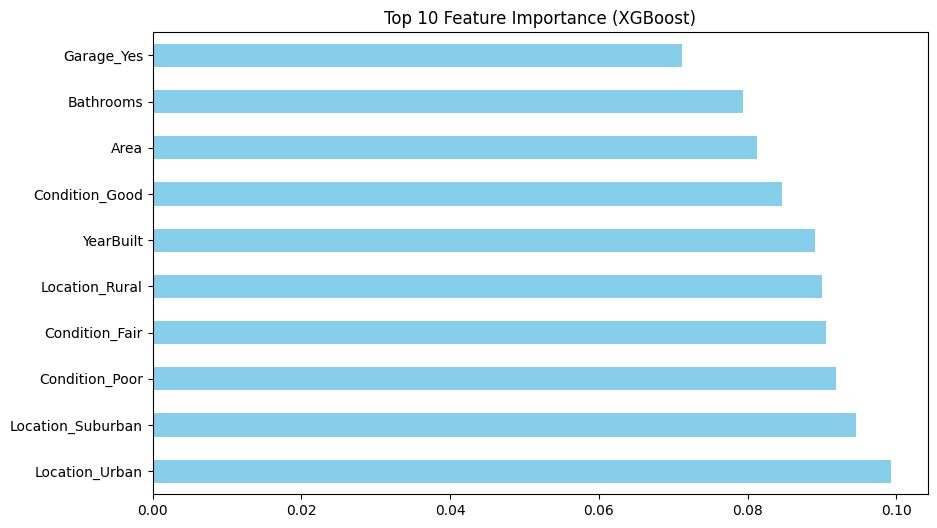

In [13]:
# Feature importance
xgb_feature_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_feature_importance.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importance (XGBoost)")
plt.show()


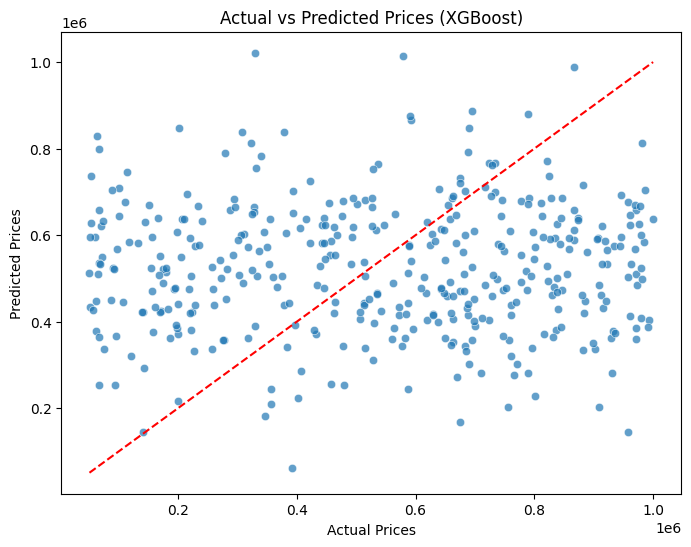

In [14]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.show()
